In [1]:
from chp4_sur_CNN import SurnamesDataset, SurnamesVectorizer
import torch
from torch import nn
import torch.nn.functional as F
import pdb

In [2]:
filename = './data/data/names/full_dataset.csv'
dataset = SurnamesDataset.load_dataset_and_make_vectorizer(filename)
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
device

device(type='cuda', index=0)

In [4]:
dataset.input_size()

87

In [5]:
dataset.output_size()

18

In [6]:
dataset.max_surname_len

20

In [7]:
dataset.get_item(0)

Unnamed: 0        5040
surname           Last
nationality    English
split            train
Name: 0, dtype: object

In [23]:
dataset._vectorizer.vectorize('Last', dataset.max_surname_len)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
dataset.head(2)

{'idx': 0, 'x_data': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'), 'y_target': tensor([0], device='cuda:0')}
{'idx': 1, 'x_data': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'), 'y_target': tensor([1], device='cuda:0')}


In [26]:
dataset[0]['x_data']

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [35]:
import pdb
class SurnamesCNN(nn.Module):
    def __init__(self, input_vocab_size, num_channels, output_vocab_size):
        super(SurnamesCNN, self).__init__()
        self.cnn1 = nn.Conv1d(in_channels=input_vocab_size, out_channels=num_channels, kernel_size=3)
        self.cnn2 = nn.Conv1d(in_channels=num_channels, out_channels=num_channels, kernel_size=3, stride=2)
        self.cnn3 = nn.Conv1d(in_channels=num_channels, out_channels=num_channels, kernel_size=3, stride=2)
        self.cnn4 = nn.Conv1d(in_channels=num_channels, out_channels=num_channels, kernel_size=3)
        self.elu = nn.ELU()
        self.fc = nn.Linear(num_channels, output_vocab_size)
        
    def forward(self, input_vec, apply_softmax=True):
        hidden1 = F.elu(self.cnn1(input_vec))
        hidden2 = F.elu(self.cnn2(hidden1))
        hidden3 = F.elu(self.cnn3(hidden2))
        hidden4 = F.elu(self.cnn4(hidden3))
        output = self.fc(hidden4.squeeze(dim=2))
        if apply_softmax == True:
            output = torch.softmax(output, dim=1)
        return output

In [36]:
model = SurnamesCNN(dataset.input_size(), 256, dataset.output_size()).to(device)

In [37]:
print(model)

SurnamesCNN(
  (cnn1): Conv1d(87, 256, kernel_size=(3,), stride=(1,))
  (cnn2): Conv1d(256, 256, kernel_size=(3,), stride=(2,))
  (cnn3): Conv1d(256, 256, kernel_size=(3,), stride=(2,))
  (cnn4): Conv1d(256, 256, kernel_size=(3,), stride=(1,))
  (elu): ELU(alpha=1.0)
  (fc): Linear(in_features=256, out_features=18, bias=True)
)


In [38]:
x_data_from_dataset = next(iter(dataset))['x_data'].to(device)
y_target_from_dataset = next(iter(dataset))['y_target'].to(device)
x_data_from_dataset, y_target_from_dataset

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0'),
 tensor([0], device='cuda:0'))

In [39]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset=dataset, batch_size=4, 
                        drop_last=False, shuffle=True)

In [40]:
sample = next(iter(dataloader))
x_data = sample['x_data']
y_target = sample['y_target']
x_data, y_target

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
       

In [41]:
y_pred = model(x_data, apply_softmax=False)
print(y_pred)
print(y_target.view(-1))

tensor([[-0.0514, -0.0418,  0.0604,  0.0045,  0.0142,  0.0037,  0.0039, -0.0145,
          0.0072,  0.0334, -0.0516,  0.0500, -0.0105,  0.0260, -0.0329,  0.0345,
         -0.0137, -0.0451],
        [-0.0500, -0.0420,  0.0488,  0.0048,  0.0189,  0.0054,  0.0040, -0.0107,
          0.0072,  0.0386, -0.0471,  0.0436, -0.0090,  0.0237, -0.0323,  0.0448,
         -0.0096, -0.0463],
        [-0.0561, -0.0400,  0.0544, -0.0027,  0.0178,  0.0077,  0.0072, -0.0209,
         -0.0016,  0.0432, -0.0570,  0.0476, -0.0085,  0.0259, -0.0244,  0.0495,
         -0.0118, -0.0453],
        [-0.0451, -0.0439,  0.0516,  0.0056,  0.0162,  0.0081,  0.0034, -0.0093,
          0.0115,  0.0489, -0.0498,  0.0440,  0.0020,  0.0190, -0.0269,  0.0364,
         -0.0163, -0.0474]], device='cuda:0', grad_fn=<ThAddmmBackward>)
tensor([ 0, 16,  1,  1], device='cuda:0')


In [42]:
ce_loss = nn.CrossEntropyLoss()

In [43]:
ce_loss(y_pred, y_target.view(-1))

tensor(2.9266, device='cuda:0', grad_fn=<NllLossBackward>)

In [44]:
# Manual check:
sf_mx = torch.softmax(y_pred, dim=1)
torch.mean(-torch.log(torch.tensor([sf_mx[i, val.item()] for i, val in enumerate(y_target)])))

tensor(2.9266)

In [45]:
from torch.optim import Adam
from tqdm import tqdm as tqdm
import pdb

In [46]:
model = SurnamesCNN(dataset.input_size(), 256, dataset.output_size()).to(device)
optim = Adam(params=model.parameters(), lr=0.001)

In [47]:
def run_batch(model, dataset, batch_type, batch_size, debug=False):
    
    if debug: pdb.set_trace()

    dataset.set_split(batch_type)
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size, 
                            drop_last=False, shuffle=True)

    running_loss = 0
    running_acc = 0

    if batch_type == 'train':
        model.train()
    else:
        model.eval()

    #for sample in tqdm(dataloader, desc='{:<{w}}'.format(batch_type, w=6)):
    for sample in dataloader:

        if model.training:
            model.zero_grad()

        x_data = sample['x_data']
        y_target = sample['y_target']

        y_pred = model(x_data, apply_softmax=False)
        loss = ce_loss(y_pred, y_target.view(-1))

        _, idx = torch.topk(torch.softmax(y_pred, dim=1), 1)
        acc = torch.sum(y_target == idx).float()

        if model.training:
            loss.backward()
            optim.step()

        running_loss += loss.to('cpu') * x_data.shape[0]
        running_acc += acc

    running_loss /= len(dataset)
    running_acc /= len(dataset)
    
    return round(running_loss.item(),4), round(running_acc.item(),4)

In [48]:
hist = []

In [49]:
num_epochs = 120
for epoch in range(num_epochs):
    tr_loss, tr_acc = run_batch(model, dataset, 'train', 200)
    val_loss, val_acc = run_batch(model, dataset, 'val', 200)
    print('{} / {} :'.format(epoch+1, num_epochs), (tr_loss, tr_acc), (val_loss, val_acc))
    hist.append([tr_loss, tr_acc, val_loss, val_acc])

1 / 120 : (2.0601, 0.3847) (1.6378, 0.5317)
2 / 120 : (1.473, 0.5774) (1.323, 0.6132)
3 / 120 : (1.2495, 0.6347) (1.1904, 0.6546)
4 / 120 : (1.1385, 0.6658) (1.0948, 0.6873)
5 / 120 : (1.0656, 0.6868) (1.0334, 0.7015)
6 / 120 : (0.9857, 0.7009) (1.0105, 0.6893)
7 / 120 : (0.9373, 0.7147) (0.9683, 0.7141)
8 / 120 : (0.8727, 0.7381) (0.9193, 0.7195)
9 / 120 : (0.8254, 0.7484) (0.9036, 0.7317)
10 / 120 : (0.7917, 0.7562) (0.914, 0.7151)
11 / 120 : (0.7367, 0.7729) (0.8672, 0.7312)
12 / 120 : (0.7042, 0.7803) (0.8903, 0.7141)
13 / 120 : (0.6568, 0.7953) (0.8539, 0.7434)
14 / 120 : (0.6178, 0.804) (0.8509, 0.7483)
15 / 120 : (0.5812, 0.814) (0.8497, 0.7483)
16 / 120 : (0.5374, 0.8267) (0.8626, 0.7405)
17 / 120 : (0.5066, 0.8354) (0.8861, 0.7371)
18 / 120 : (0.4735, 0.8462) (0.8962, 0.74)
19 / 120 : (0.4381, 0.8553) (0.9071, 0.7512)
20 / 120 : (0.4072, 0.8585) (0.9407, 0.7385)
21 / 120 : (0.3727, 0.8761) (0.9671, 0.7439)
22 / 120 : (0.3424, 0.8818) (1.0518, 0.7288)
23 / 120 : (0.3155, 0.89) 

In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
plt_hist = np.array(hist)

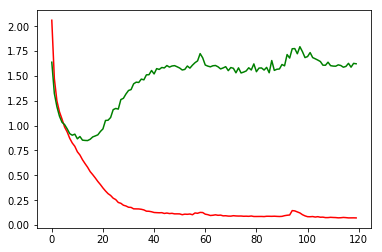

In [52]:
plt.plot(plt_hist[:,0], 'r', plt_hist[:,2], 'g')

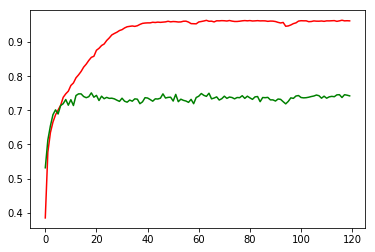

In [53]:
plt.plot(plt_hist[:,1], 'r', plt_hist[:,3], 'g')

In [54]:
run_batch(model, dataset, 'test', 512)

(1.8319, 0.7254)

In [62]:
def predict_nationality(surname):
    x_data = torch.tensor(dataset._vectorizer.vectorize(surname, 
                                                        dataset.max_surname_len)).float().unsqueeze(dim=0).to(device)
    y_pred = model(x_data, apply_softmax=True)
    probs, idx = y_pred.topk(5)
    topk = list(idx.squeeze().cpu().numpy())
    for i, k in enumerate(topk):
        print('{} {:2.0%}'.format(
            dataset._vectorizer.nationality_vocab.lookup_index(k),
            probs[0,i].item()))

In [63]:
predict_nationality('Bagmevsky')

Russian 100%
Czech 0%
Polish 0%
German 0%
English 0%


In [64]:
predict_nationality('O\'Neil')

Irish 100%
English 0%
Portuguese 0%
Spanish 0%
Italian 0%


In [65]:
predict_nationality('Oliveira')

Portuguese 66%
Spanish 29%
English 4%
Italian 0%
Greek 0%
